In [15]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *

from tqdm import tqdm
import itertools

from representation_analysis import *
from explore_analysis import *

import umap

In [27]:
trial = 0
obs = 2
# exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs3hidden64longer_t{trial}.pt'
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'
# exp_name = f'../saved_models/explorenav_pos/expl_givegoal_num10_t{trial}.pt'
env_kwargs = get_explore_kwargs(obs, shaping='none')
env_kwargs = {'obs_set': '2d', 'max_steps': 300, 'obs_set_arg': 50}
model, obs_rms = torch.load(exp_name)

In [28]:
res = evaluate(model, obs_rms, env_name='ExploreNav-v0', env_kwargs=env_kwargs,
               with_activations=True, data_callback=explore_data_callback, verbose=2)

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ep 0, rew tensor([[4.]])
ep 1, rew tensor([[0.]])
ep 2, rew tensor([[3.]])
ep 3, rew tensor([[7.]])
ep 4, rew tensor([[1.]])
ep 5, rew tensor([[0.]])
ep 6, rew tensor([[7.]])
ep 7, rew tensor([[3.]])
ep 8, rew tensor([[5.]])
ep 9, rew tensor([[0.]])
 Evaluation using 0 episodes: mean reward nan



C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
set_trajectory_plot_style()

(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

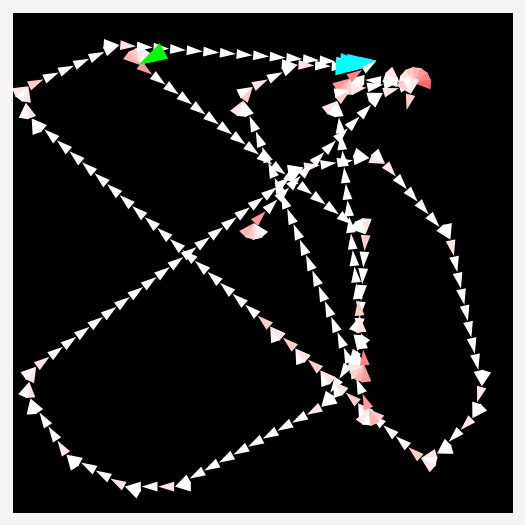

In [29]:
i = 7
pos = res['data']['pos'][i]
angle = res['data']['angle'][i]
rew = res['rewards'][i]
draw_trajectory(pos, angle, rew=rew)

(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

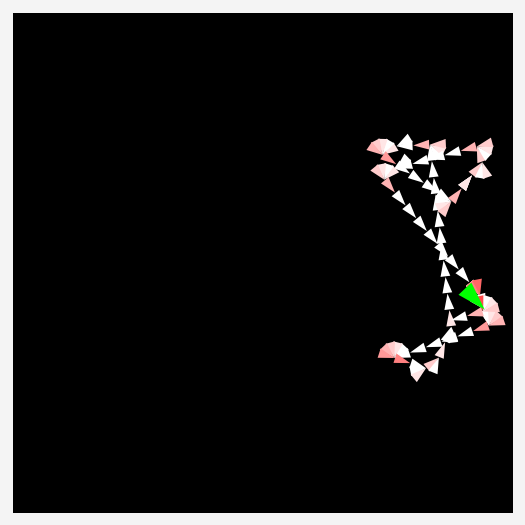

In [13]:
i = 5
pos = res['data']['pos'][i][200:300]
angle = res['data']['angle'][i][200:300]
rew = res['rewards'][i][200:300]
draw_trajectory(pos, angle, rew=rew)

In [93]:
pplt.rc.reset()

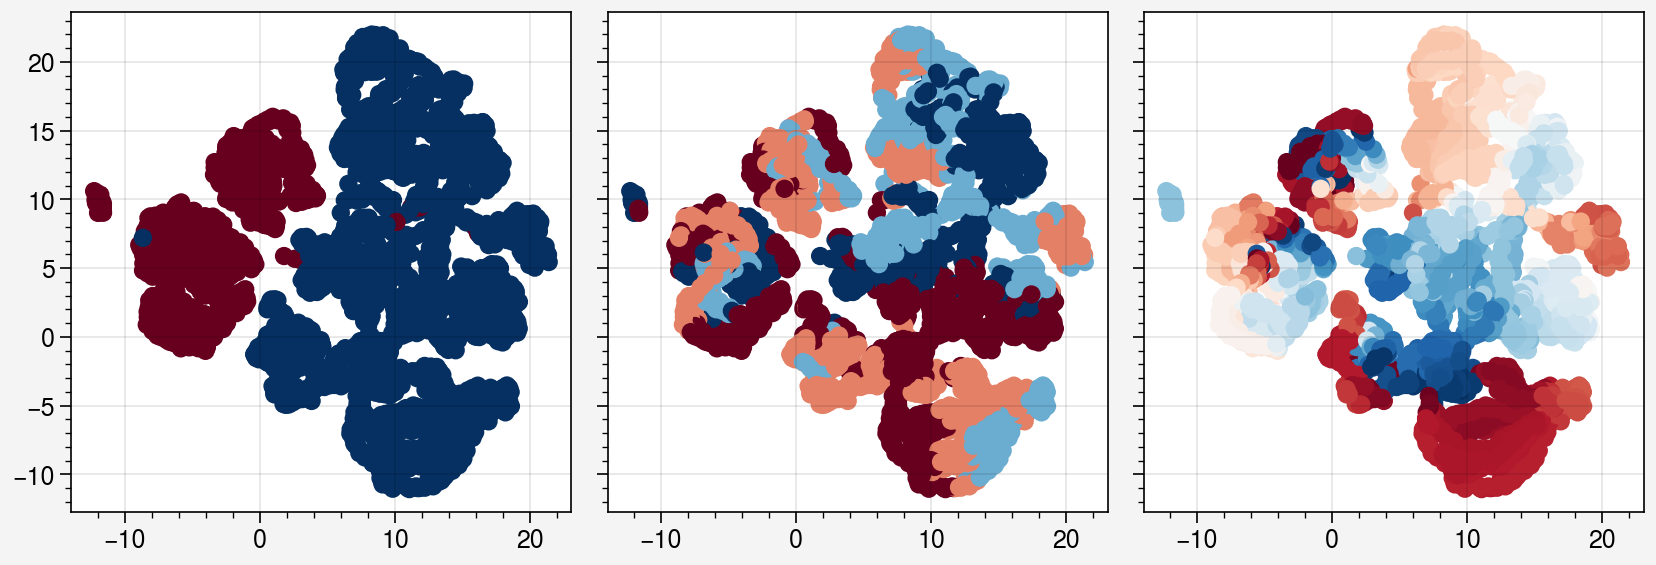

In [95]:
activs = ep_stack_activations(res, True)

u = umap.UMAP(min_dist=1.)

activ_2d = u.fit_transform(activs['shared_activations'][1])
goal_reached_c = np.stack(res['data']['goal_reached']).reshape(-1)*2 -1

pos = np.vstack(res['data']['pos'])
quad1 = (pos[:, 0] > 150) & (pos[:, 1] > 150)
quad2 = (pos[:, 0] < 150) & (pos[:, 1] > 150)
quad3 = (pos[:, 0] < 150) & (pos[:, 1] < 150)
quad4 = (pos[:, 0] > 150) & (pos[:, 1] < 150)
quad_color = quad1*-2 + quad2*-1 + quad3*1 + quad4*2

angle = np.vstack(res['data']['angle']).squeeze()

fig, ax = pplt.subplots(ncols=3)

ax[0].scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached_c)
ax[1].scatter(activ_2d.T[0], activ_2d.T[1], c=quad_color)
ax[2].scatter(activ_2d.T[0], activ_2d.T[1], c=angle)

In [102]:
activ = activs['shared_activations'][1]
goal_reached = np.stack(res['data']['goal_reached']).reshape(-1)

In [111]:
goal_steps = goal_reached.sum()
x = np.vstack([np.full((goal_steps,), i) for i in range(64)])
x = x.reshape(-1)
y = activ[goal_reached].reshape(-1)

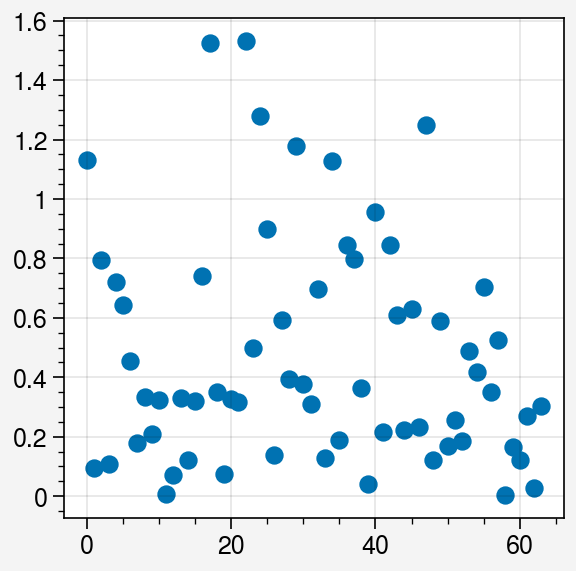

In [127]:
fig, ax = pplt.subplots()
goal_mean = activ[goal_reached].mean(axis=0)
no_goal_mean = activ[~goal_reached].mean(axis=0)
goal_diff = np.abs(goal_mean - no_goal_mean)
ax.scatter(np.arange(64), goal_diff)


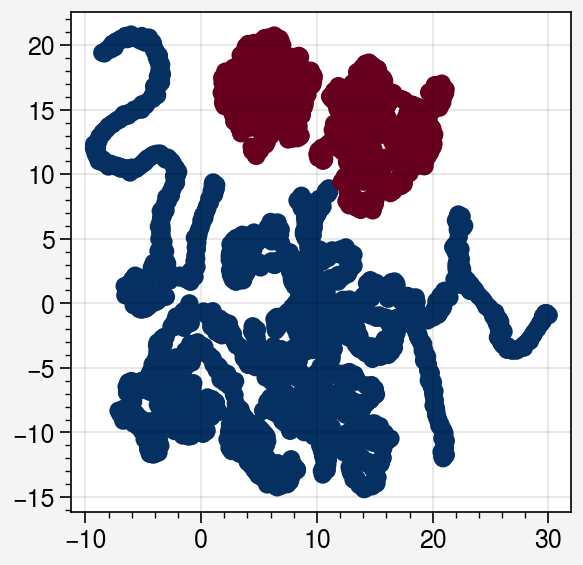

In [47]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached)

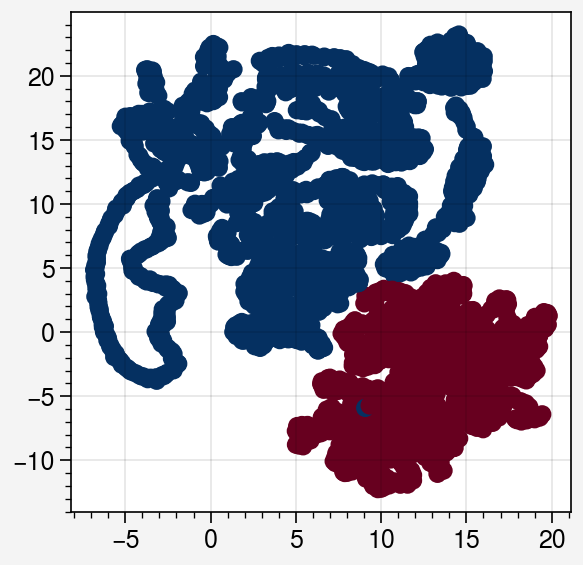

In [53]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached)

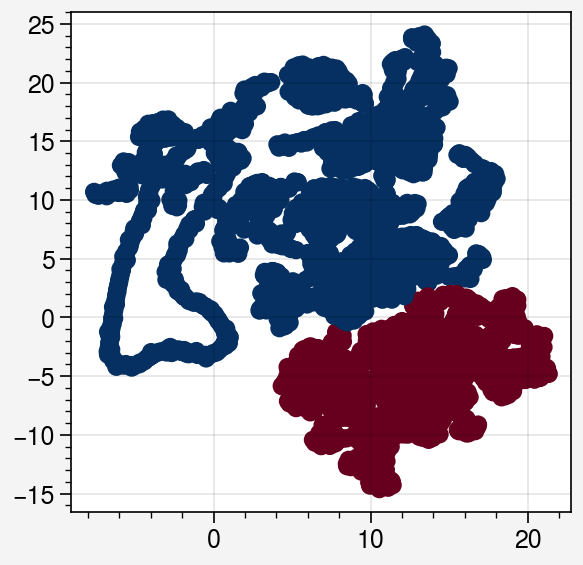

In [72]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached)

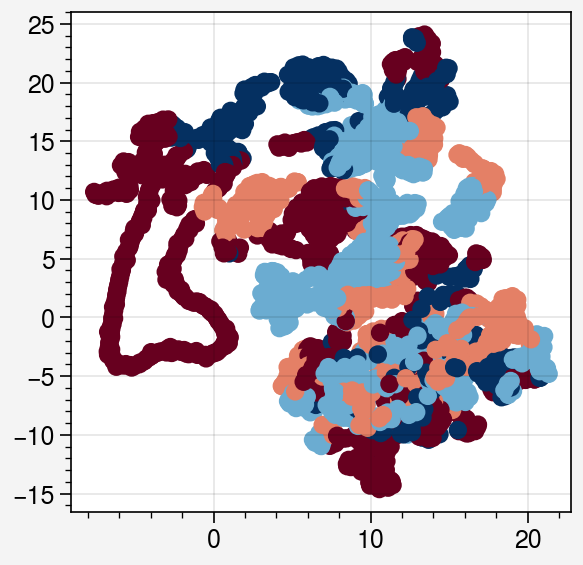

In [73]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=quad_color)

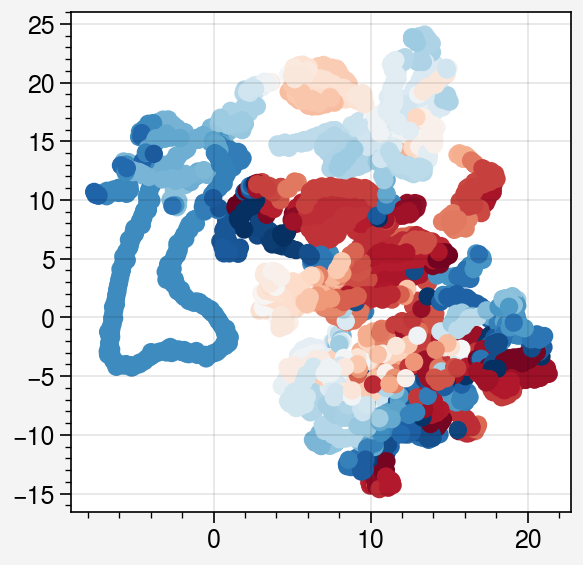

In [77]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=angle)

In [54]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA()
activ_2d = pca.fit_transform(activs['shared_activations'][1])
goal_reached = np.stack(res['data']['goal_reached']).reshape(-1)*2 -1

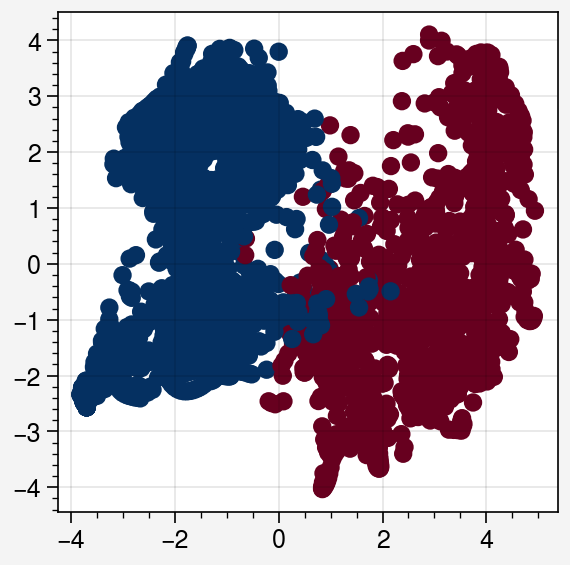

In [57]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached)

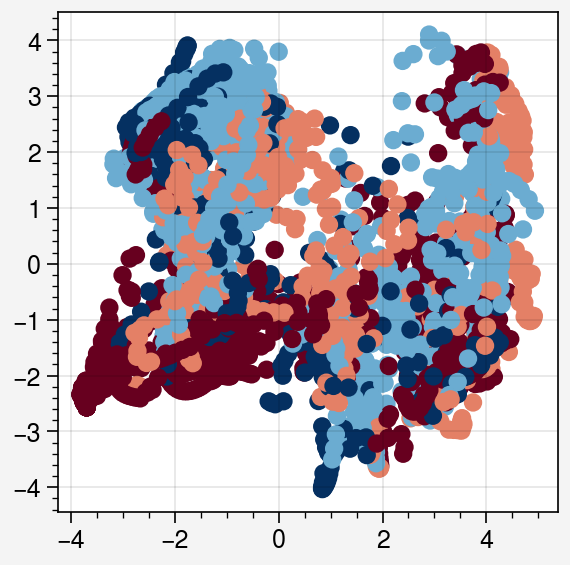

In [70]:
fig, ax = pplt.subplots()
# ax.scatter(activ_2d.T[0], activ_2d.T[1])
ax.scatter(activ_2d.T[0], activ_2d.T[1], c=quad_color)

In [ ]:
res = evaluate(model, obs_rms, env_name='ExploreNav-v0', env_kwargs=env_kwargs,
               with_activations=True, data_callback=explore_data_callback, verbose=2,
               num_episodes=100)

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ep 0, rew tensor([[0.]])
ep 1, rew tensor([[1.]])
ep 2, rew tensor([[5.]])
ep 3, rew tensor([[0.]])
ep 4, rew tensor([[5.]])
ep 5, rew tensor([[6.]])
ep 6, rew tensor([[9.]])
ep 7, rew tensor([[9.]])
ep 8, rew tensor([[0.]])
ep 9, rew tensor([[0.]])
ep 10, rew tensor([[0.]])
ep 11, rew tensor([[3.]])
ep 12, rew tensor([[1.]])
ep 13, rew tensor([[8.]])
ep 14, rew tensor([[0.]])
ep 15, rew tensor([[2.]])
ep 16, rew tensor([[11.]])
ep 17, rew tensor([[0.]])
ep 18, rew tensor([[9.]])
ep 19, rew tensor([[9.]])
ep 20, rew tensor([[0.]])
ep 21, rew tensor([[10.]])
ep 22, rew tensor([[4.]])
ep 23, rew tensor([[10.]])
ep 24, rew tensor([[7.]])
ep 25, rew tensor([[5.]])
ep 26, rew tensor([[9.]])
ep 27, rew tensor([[7.]])
ep 28, rew tensor([[10.]])
ep 29, rew tensor([[12.]])
ep 30, rew tensor([[9.]])
ep 31, rew tensor([[0.]])
ep 32, rew tensor([[0.]])
ep 33, rew tensor([[0.]])
ep 34, rew tensor([[3.]])
ep 35, rew tensor([[11.]])
ep 36, rew tensor([[10.]])
ep 37, rew tensor([[0.]])
ep 38, rew tens

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


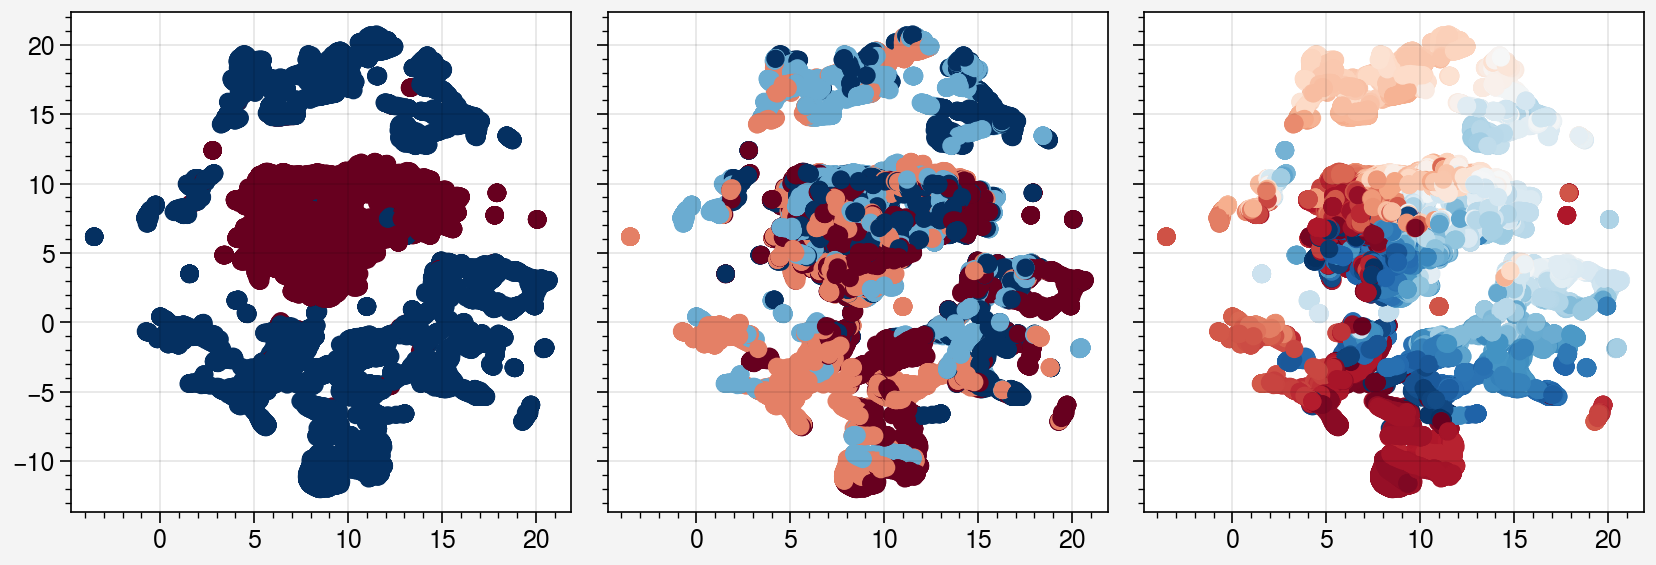

In [130]:
activs = ep_stack_activations(res, True)

u = umap.UMAP(min_dist=0.1)

activ_2d = u.fit_transform(activs['shared_activations'][1])
goal_reached_c = np.stack(res['data']['goal_reached']).reshape(-1)*2 -1

pos = np.vstack(res['data']['pos'])
quad1 = (pos[:, 0] > 150) & (pos[:, 1] > 150)
quad2 = (pos[:, 0] < 150) & (pos[:, 1] > 150)
quad3 = (pos[:, 0] < 150) & (pos[:, 1] < 150)
quad4 = (pos[:, 0] > 150) & (pos[:, 1] < 150)
quad_color = quad1*-2 + quad2*-1 + quad3*1 + quad4*2

angle = np.vstack(res['data']['angle']).squeeze()

fig, ax = pplt.subplots(ncols=3)

ax[0].scatter(activ_2d.T[0], activ_2d.T[1], c=goal_reached_c)
ax[1].scatter(activ_2d.T[0], activ_2d.T[1], c=quad_color)
ax[2].scatter(activ_2d.T[0], activ_2d.T[1], c=angle)

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
activs = ep_stack_activations(res, False)

# activ = activs['shared_activations'][1]
activ = torch.hstack([a['shared_activations'] for a in activs[:90]])[1]
pos = np.vstack(res['data']['pos'][:90])
angle = np.vstack(res['data']['angle'][:90]).squeeze()

X_train = activ
y_train = angle
y_train = pos[:,1]


activ = torch.hstack([a['shared_activations'] for a in activs[90:]])[1]
pos = np.vstack(res['data']['pos'][90:])
angle = np.vstack(res['data']['angle'][90:]).squeeze()

X_test = activ
y_test = angle
y_test = pos[:,1]


46.21214679318891

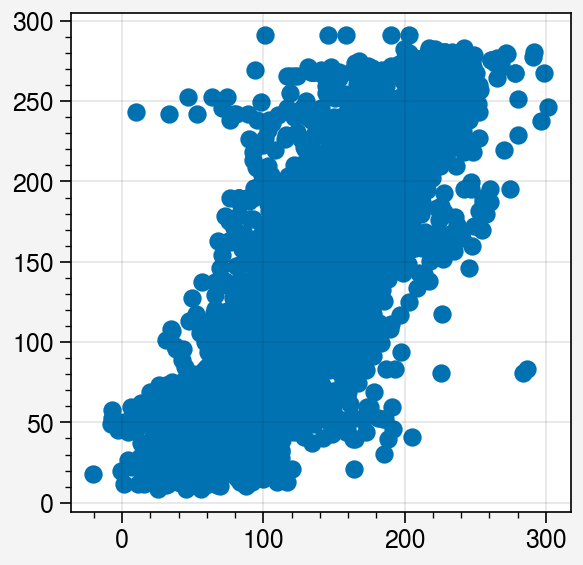

In [169]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = pplt.subplots()
ax.scatter(y_pred, y_test)
np.sqrt(mean_squared_error(y_pred, y_test))

In [225]:
activs = ep_stack_activations(res, False)

ep_goal_pos = []
for i in range(len(res['data']['goal'])):
    goal = res['data']['goal'][i]
    ep_goal_pos.append(np.full((302, 2), goal))

# activ = activs['shared_activations'][1]
activ = torch.hstack([a['shared_activations'] for a in activs[:90]])[1]
pos = np.vstack(res['data']['pos'][:90])
goal_pos = np.vstack(ep_goal_pos[:90])
angle = np.vstack(res['data']['angle'][:90]).squeeze()
goal_reached = np.vstack(res['data']['goal_reached'][:90]).reshape(-1)

X_train = activ[goal_reached]
y_train = angle
y_train = pos[goal_reached, 0]
y_train = goal_pos[goal_reached, 1]


activ = torch.hstack([a['shared_activations'] for a in activs[90:]])[1]
pos = np.vstack(res['data']['pos'][90:])
goal_pos = np.vstack(ep_goal_pos[90:])
angle = np.vstack(res['data']['angle'][90:]).squeeze()
goal_reached = np.vstack(res['data']['goal_reached'][90:]).reshape(-1)

X_test = activ[goal_reached]
y_test = angle
y_test = pos[goal_reached, 0]
y_test = goal_pos[goal_reached, 1]


18.958594286862354

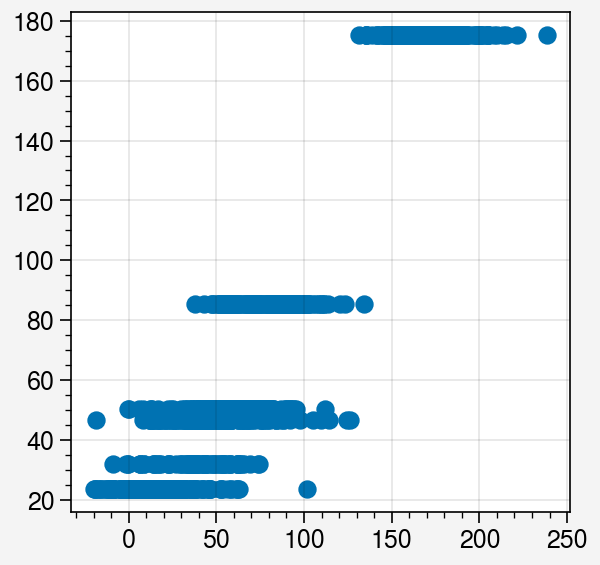

In [226]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = pplt.subplots()
ax.scatter(y_pred, y_test)
np.sqrt(mean_squared_error(y_pred, y_test))

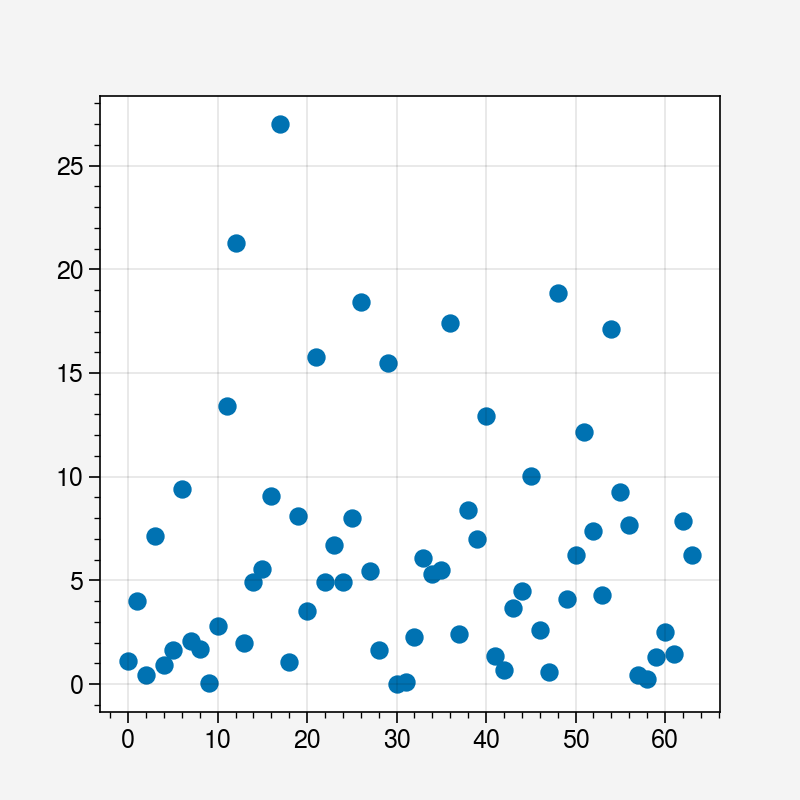

In [227]:
plt.scatter(np.arange(64), np.abs(lr.coef_))

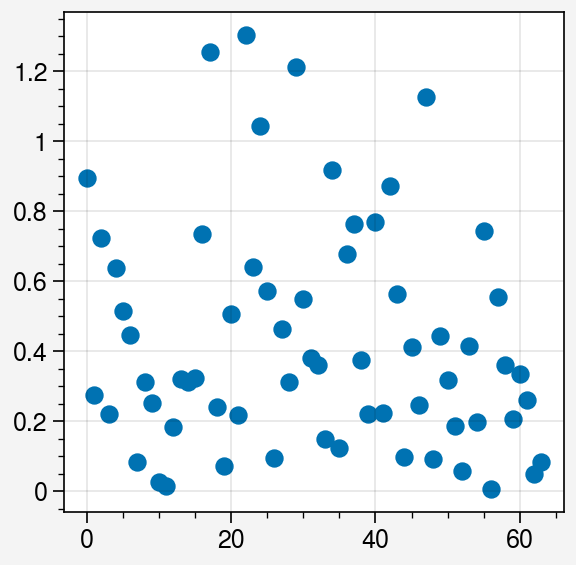

In [224]:
activ = torch.hstack([a['shared_activations'] for a in activs])[1]
goal_reached = np.stack(res['data']['goal_reached']).reshape(-1)

fig, ax = pplt.subplots()
goal_mean = activ[goal_reached].mean(axis=0)
no_goal_mean = activ[~goal_reached].mean(axis=0)
goal_diff = np.abs(goal_mean - no_goal_mean)
ax.scatter(np.arange(64), goal_diff)

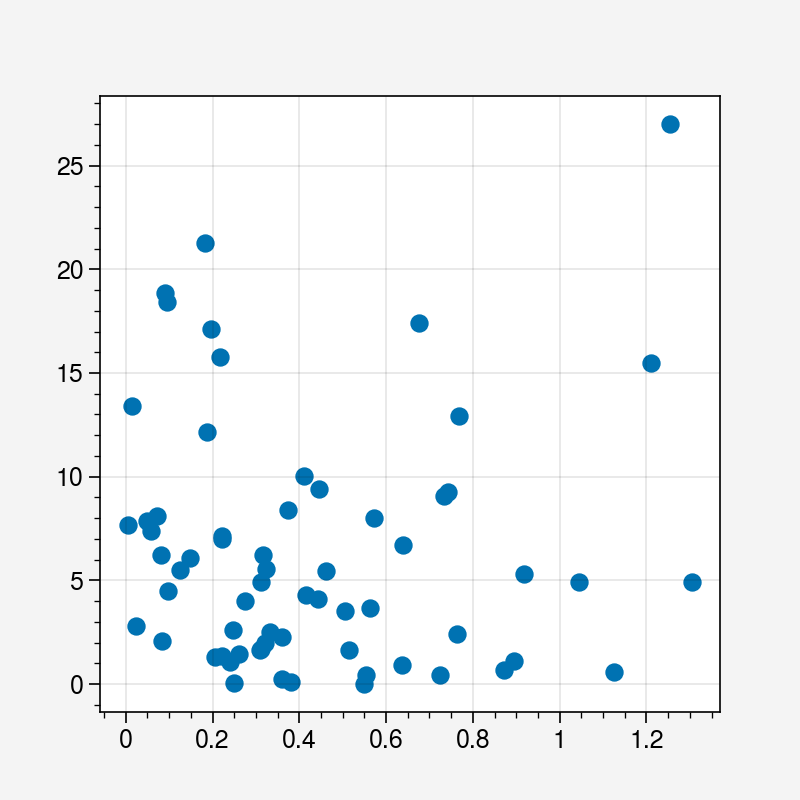

In [229]:
plt.scatter(goal_diff, np.abs(lr.coef_))